# Linear Congruence Generator

## Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def LCG(a, b, m, samples=20, mode=1, x0_values=5):
    '''
    input:
    mode 1: Returns result containing seed from 0 to m - 1.
    mode 2: Returns result containing x0_values from 500 and so on.
    samples: sample size
    
    output:
    returns numpy ndarray (samples + 1, m) generations and corresponding array of values of m for dataframe creation.'''

    if mode == 1:
        result = np.zeros(shape=(samples + 1, m), dtype="int")
        x0_list = np.arange(m)
    else:
        result = np.zeros(shape=(samples + 1, x0_values), dtype="int")
        x0_list = list()
        
        for i in range(x0_values):
            x0_list.append((i + 1) * 1_000)
    
    for index, x0 in enumerate(x0_list):
        result[0, index] = x0
        xi = x0
        for i in range(1, samples + 1):
            xi = (a * xi + b) % m
            result[i, index] = xi
    u_result = result[1:, :] / m
    
    return result, u_result, x0_list

In [3]:
def displayGeneration(result, column_names, mode="x", index=None):
    '''input:
    result: (samples + 1, m) dimensional array. NOTE: if mode = 'g' then result is (20, seed_values) dimensional.
    column_names: (m, ) array
    mode x: displays xi values.
    mode u: displays ui values.
    mode g: displays groups of intervals.
    
    output:
    returns pandas dataframe of generated LCG.'''
    
    if mode == "u":
        result_df = pd.DataFrame(result, columns=column_names)
        result_df.index += 1
    elif mode == "g":
        result_df = pd.DataFrame(result, columns=column_names, index=index)
        result_df.index.name = "range/x_0"
    else:
        result_df = pd.DataFrame(result, columns=(column_names))
        result_df.index.name = "i/x_0"
    
    return result_df

In [4]:
def displayDistinct(result, column_names):
    '''input:
    results- (samples + 1, m) dimensional array.
    
    output:
    returns number of dictinct outputs before repetition for each value of m.'''
    samples, m = result.shape
    rep = np.zeros(m, dtype=np.int32)
    for i in range(m):
        rep[i] = len(set(result[:, i]))
    repetition = pd.DataFrame(rep.reshape(1, m), columns=column_names)
    repetition.index.name = "repetitions/x_0"
    return repetition

In [5]:
def splitGroups(u_result, interval_length=0.05):
    '''
    input: 
    u_result: ui's matrix of dimension (samples, seed_values)
    
    output:
    A (ceil(1 / interval_length), seed_values) dimension matrix with each row i representing freq of nos in 
    [i * interval_length, (i + 1) * interval_length].
    '''
    samples, m = u_result.shape
    n_groups = int(np.ceil(1 / interval_length))
    groupings = np.empty((n_groups, m), dtype=np.int32)
    
    group_index = list() # np.linspace(interval_length, 1, n_groups)
    for i in range(n_groups):
        range_str = "[" + str(round(i * interval_length, 2)) + ", " + str(round((i + 1) * interval_length, 2)) + ")"
        group_index.append(range_str)
    
    for i in range(n_groups):
        bool_mask = np.logical_and(u_result >= i * interval_length, u_result < (i + 1) * interval_length)
        groupings[i, :] = bool_mask.sum(axis=0)
        
    return groupings, group_index

In [6]:
def plotObservations(groupings1, col_names, file_name, interval_length=0.05, mode=1, group_index=None, a1=None, a2=None, groupings2=None):
    '''
    input: 
    groupings1, groupings2: ui's matrix of dimension (samples, seed_values)
    col_names: randomly chosen seeds for LCG.
    mode 1: plots a bar graph for question 2.
    group_index: for mode 1.
    mode 2: plots (u_i-1, u_i) for question 3.
    
    output:
    seed_value number of histograms with 20 bins representing freq of elements in each 0.05 interval.\
    saves the file with the given file_name.
    '''
    if mode == 1:
        n_groups = int(np.ceil(1 / interval_length))
        samples, m = groupings1.shape
        plt.figure(figsize=(24, 6 * m))
    
        for i in range(m):
            plt.subplot(m, 1, i + 1)
            X_axis = np.arange(samples)
            plt.bar(X_axis - 0.2, groupings1.iloc[:, i], 0.4, label="a=" + str(a1))
            plt.bar(X_axis + 0.2, groupings2.iloc[:, i], 0.4, label="a=" + str(a2))
            
            plt.title(f"Seed: {col_names[i]}")
            plt.xlabel("ranges")
            plt.ylabel("frequencies")
            plt.xticks(X_axis, group_index, rotation=30)
            plt.legend()
            
        plt.subplots_adjust(hspace=0.3)
        
        
    else:
        plt.figure(figsize=(6, 6))
        plt.scatter(groupings1[:-1], groupings1[1:])
        plt.xlabel("u_i-1")
        plt.ylabel("u_i")
    
    plt.savefig(file_name)
    plt.show()

## Task 1

### Task 1.1: Generate the sequence of numbers xi for a=6, b=0, m=11, and x0 ranging from 0 to 10. Observe the sequence of numbers generated and observe the repetition of values. Tabulate these for each group of values. How many distinct values appear before repetitions? Which, in your opinion, are the best choices and why?

In [7]:
result1, _, col_names1 = LCG(a=6, b=0, m=11, samples=11)
result1_df = displayGeneration(result1, col_names1)
result1_df.to_csv("task1-1_result.csv", index=True)
result1_df

,0,1,2,3,4,5,6,7,8,9,10
i/x_0,,,,,,,,,,,
0,0,1,2,3,4,5,6,7,8,9,10
1,0,6,1,7,2,8,3,9,4,10,5
2,0,3,6,9,1,4,7,10,2,5,8
3,0,7,3,10,6,2,9,5,1,8,4
4,0,9,7,5,3,1,10,8,6,4,2
5,0,10,9,8,7,6,5,4,3,2,1
6,0,5,10,4,9,3,8,2,7,1,6
7,0,8,5,2,10,7,4,1,9,6,3
8,0,4,8,1,5,9,2,6,10,3,7


In [8]:
result1_rep = displayDistinct(result1, col_names1)
result1_rep.to_csv("task1-1_rep.csv", index=True)
result1_rep

,0,1,2,3,4,5,6,7,8,9,10
repetitions/x_0,,,,,,,,,,,
0,1,10,10,10,10,10,10,10,10,10,10


### Task 1.2: Generate the sequence of numbers xi for a = 3, b = 0, m = 11, and x0 ranging from 0 to 10. Observe the sequence of numbers generated and observe the repetition of values. Tabulate these for each group of values. How many distinct values appear before repetitions? Which, in your opinion, are the best choices and why?

In [9]:
result2, _, col_names2 = LCG(a=3, b=0, m=11, samples=11)
result2_df = displayGeneration(result2, col_names2)
result2_df.to_csv("task1-2_result.csv", index=True)
result2_df

,0,1,2,3,4,5,6,7,8,9,10
i/x_0,,,,,,,,,,,
0,0,1,2,3,4,5,6,7,8,9,10
1,0,3,6,9,1,4,7,10,2,5,8
2,0,9,7,5,3,1,10,8,6,4,2
3,0,5,10,4,9,3,8,2,7,1,6
4,0,4,8,1,5,9,2,6,10,3,7
5,0,1,2,3,4,5,6,7,8,9,10
6,0,3,6,9,1,4,7,10,2,5,8
7,0,9,7,5,3,1,10,8,6,4,2
8,0,5,10,4,9,3,8,2,7,1,6


In [10]:
result2_rep = displayDistinct(result2, col_names2)
result2_rep.to_csv("task1-2_rep.csv", index=True)
result2_rep

,0,1,2,3,4,5,6,7,8,9,10
repetitions/x_0,,,,,,,,,,,
0,1,5,5,5,5,5,5,5,5,5,5


## Task 2

### Task 2.1: Generate a sequence ui, i = 1, 2, . . . , 10000 with m = 244944, a = 1597 (choosing x0 as per your choice). Then group the values in the ranges [0, 0.05), [0.05, 0.10), [0.10, 0.15), . . . , [0.95, 1) and observe their frequencies (i.e., the number of values falling in each group). For 5 different x0 values, tabulate the frequencies in each case, draw the bar diagrams for these data and put in your observations.



In [11]:
result3, u_result3, col_names3 = LCG(a=1597, b=0, m=244944, samples=10_000, mode=2)
# displayGeneration(result3, col_names3)

In [12]:
# displayDistinct(result3, col_names3)

In [13]:
# displayGeneration(u_result3, col_names3, mode="u")

In [14]:
groupings3, group_index3 = splitGroups(u_result3)
result3_df = displayGeneration(groupings3, col_names3, mode="g", index=group_index3)
result3_df.to_csv("task2-1_result.csv", index=True)
result3_df

,1000,2000,3000,4000,5000
range/x_0,,,,,
"[0.0, 0.05)",495,494,492,494,493
"[0.05, 0.1)",494,499,495,493,506
"[0.1, 0.15)",503,504,494,513,492
"[0.15, 0.2)",493,496,492,496,496
"[0.2, 0.25)",504,505,495,505,507
"[0.25, 0.3)",496,490,495,492,495
"[0.3, 0.35)",505,510,534,510,509
"[0.35, 0.4)",492,493,493,493,496
"[0.4, 0.45)",508,507,492,510,506


In [15]:
result6_df = displayDistinct(result3, col_names3)
result6_df

,1000,2000,3000,4000,5000
repetitions/x_0,,,,,
0,729,729,243,729,729


### Task 2.2: Generate a sequence ui, i = 1, 2, . . . , 10000 with m = 244944, a = 51749 (choosing x0 as per your choice). Then group the values in the ranges [0, 0.05), [0.05, 0.10), [0.10, 0.15), . . . , [0.95, 1) and observe their frequencies (i.e., the number of values falling in each group). For 5 different x0 values, tabulate the frequencies in each case, draw the bar diagrams for these data and put in your observations.


In [16]:
result4, u_result4, col_names4 = LCG(a=51749, b=0, m=244944, samples=10_000, mode=2)
groupings4, group_index4 = splitGroups(u_result4)
result4_df = displayGeneration(groupings4, col_names4, mode="g", index=group_index4)
result4_df.to_csv("task2-2_result.csv", index=True)
result4_df

,1000,2000,3000,4000,5000
range/x_0,,,,,
"[0.0, 0.05)",496,488,555,491,495
"[0.05, 0.1)",494,497,431,510,493
"[0.1, 0.15)",496,494,495,493,491
"[0.15, 0.2)",496,497,556,519,515
"[0.2, 0.25)",515,495,494,494,497
"[0.25, 0.3)",514,498,431,490,495
"[0.3, 0.35)",511,517,556,513,512
"[0.35, 0.4)",492,496,557,497,494
"[0.4, 0.45)",491,516,371,495,518


In [17]:
result7_df = displayDistinct(result4, col_names4)
result7_df

,1000,2000,3000,4000,5000
repetitions/x_0,,,,,
0,486,486,162,486,486


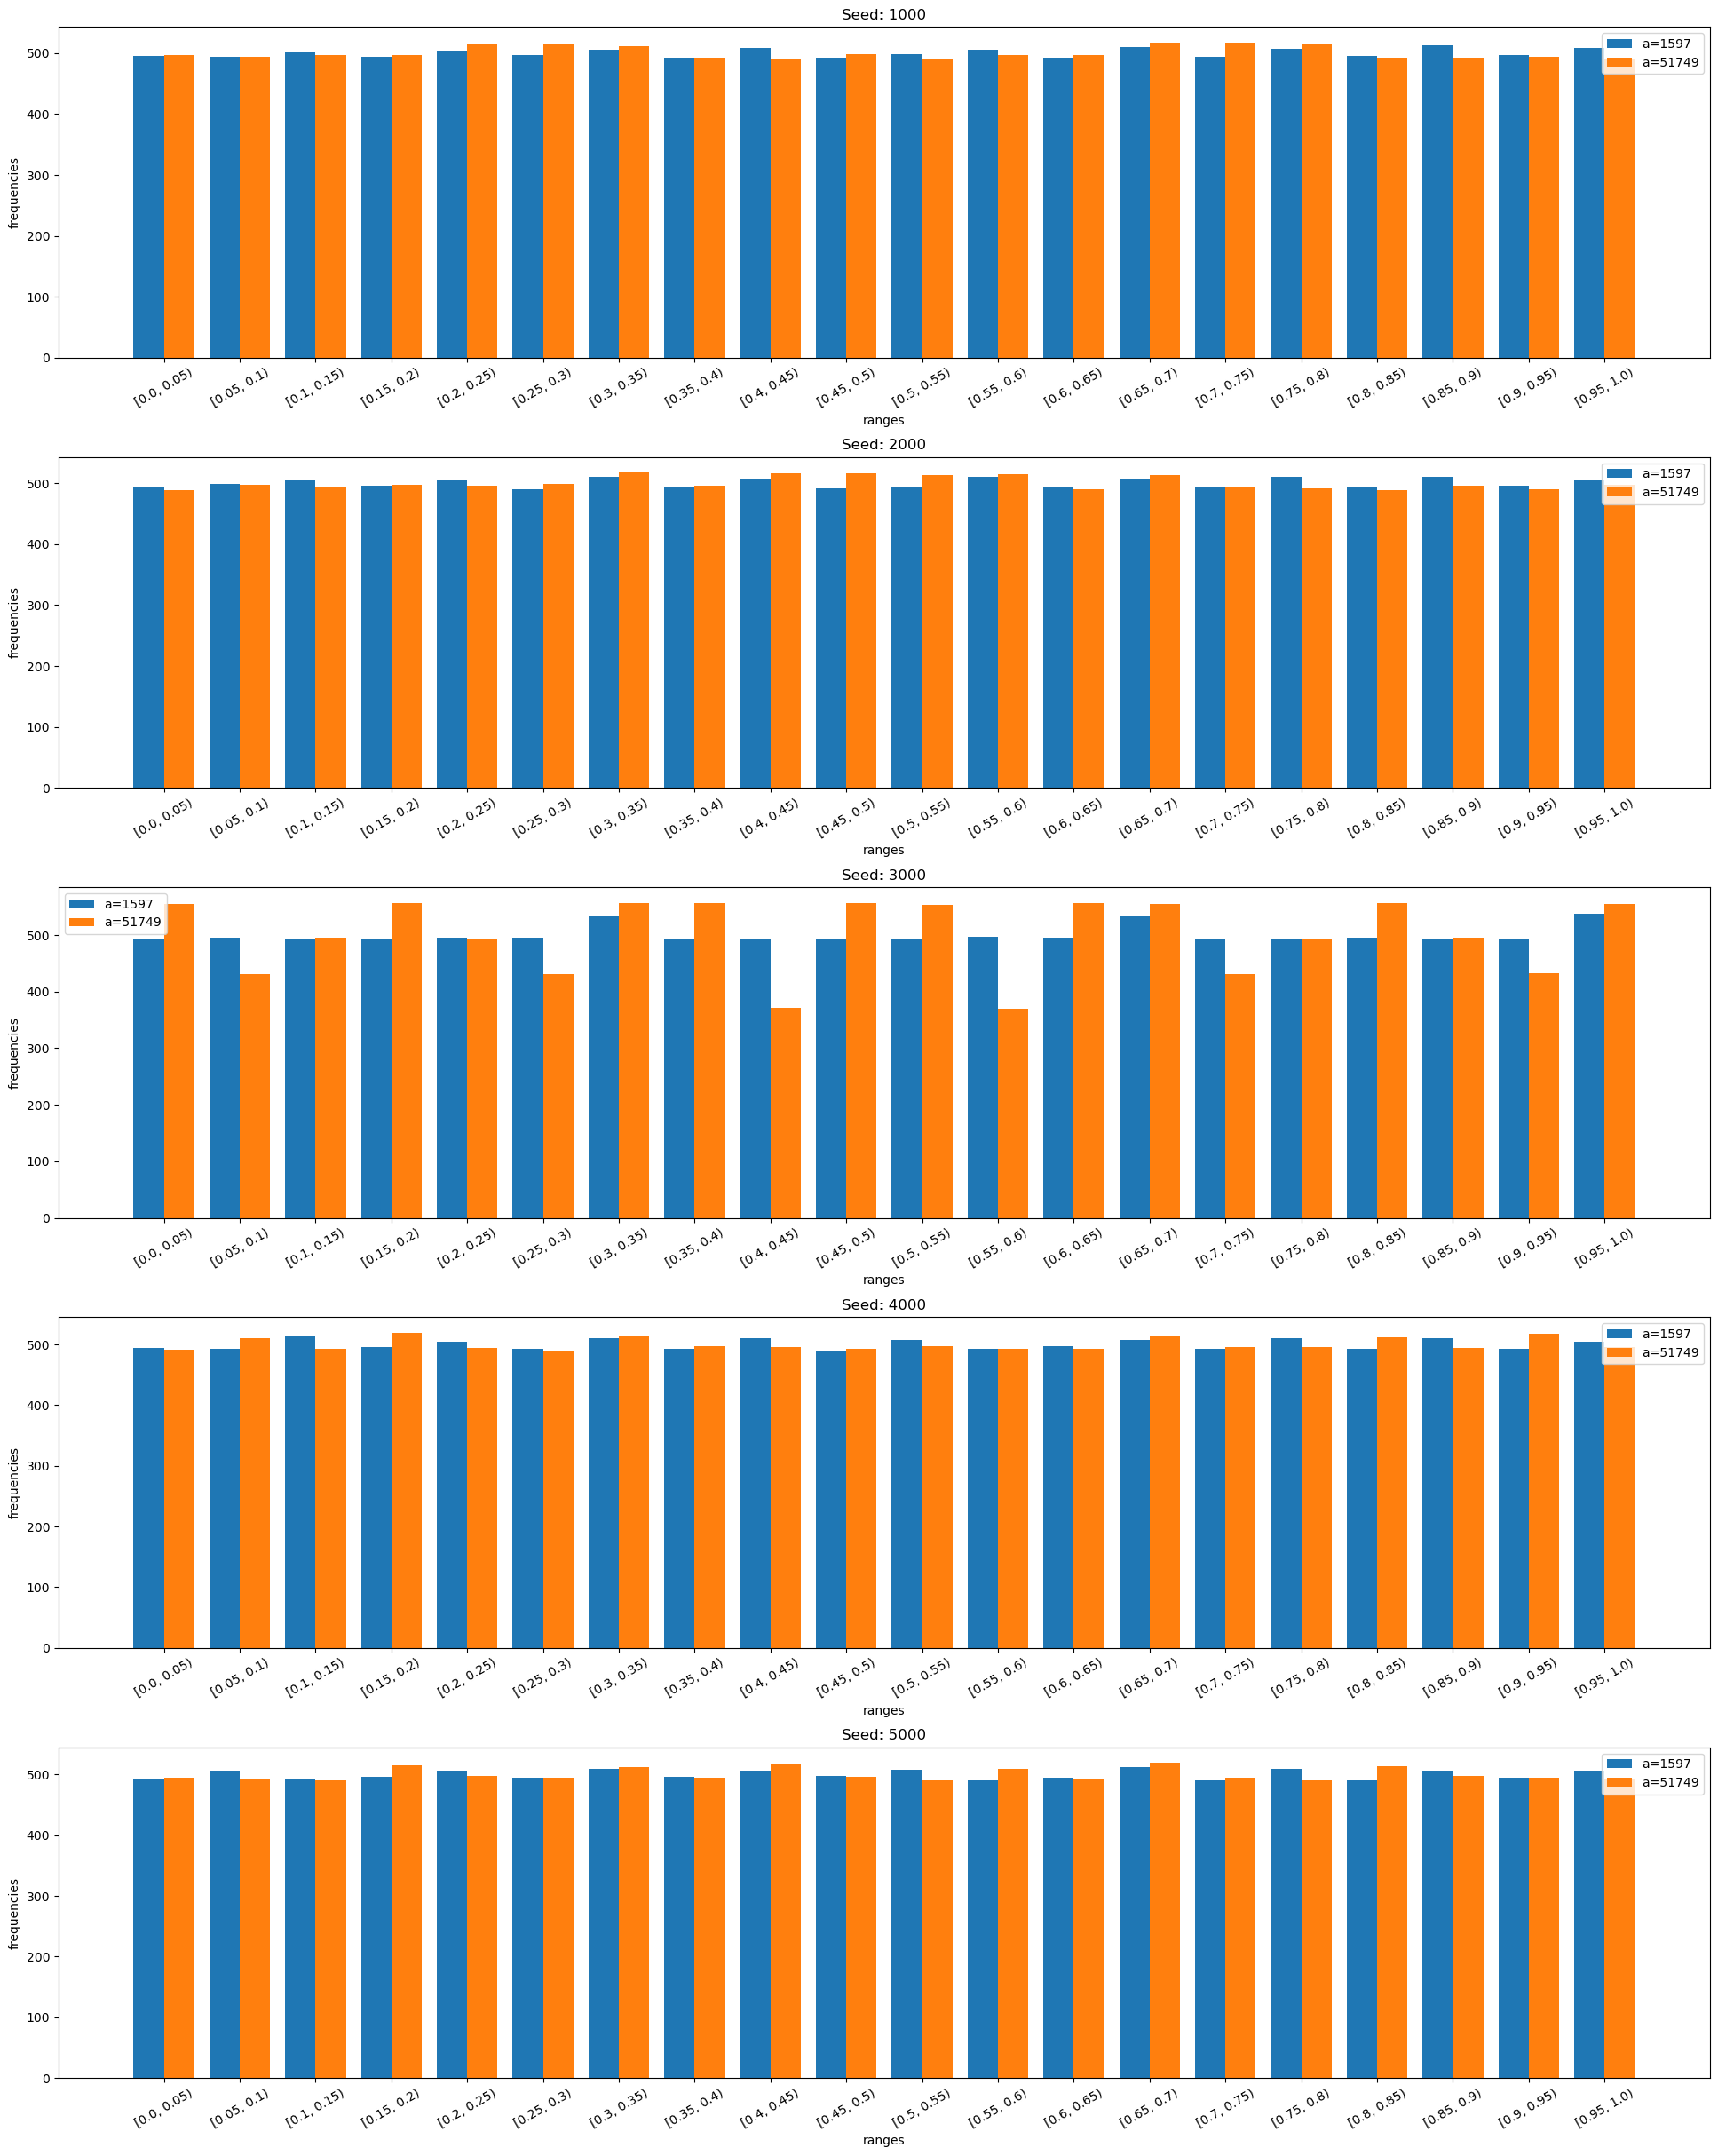

In [18]:
plotObservations(groupings1 = result3_df, groupings2 = result4_df, a1=1597, a2=51749, col_names=col_names4, group_index=group_index4, file_name="task2_multibar")

## Task 3

### Task 3.1: Generate a sequence ui,i = 1,2,...,10000 with a = 1229, b = 1, m = 2048. Plot in a two-dimensional graph the points (ui−1, ui), i.e., the points (u1, u2), (u2, u3), (u3, u4), . . . .


In [19]:
result5, u_result5, col_names5 = LCG(a=1229, b=1, m=2048, samples=10_000, mode=2, x0_values=1)
groupings5, group_index5 = splitGroups(u_result5)
result5_df = displayGeneration(groupings5, col_names5, mode="g", index=group_index5)
result5_df.to_csv("task3-1_result.csv", index=True)
result5_df

,1000
range/x_0,
"[0.0, 0.05)",501
"[0.05, 0.1)",499
"[0.1, 0.15)",503
"[0.15, 0.2)",498
"[0.2, 0.25)",500
"[0.25, 0.3)",498
"[0.3, 0.35)",500
"[0.35, 0.4)",498
"[0.4, 0.45)",496


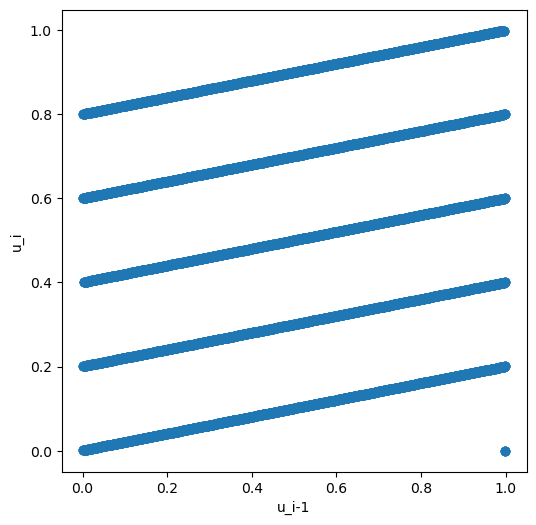

In [20]:
plotObservations(u_result5, col_names5, mode=2, file_name="task3-1plot")